#Publication Metadata

Contains analysis of publication metadata such as p-values, reported sample sizes, keyword highlights, abstracts, and journal title lengths, and number of authors.

## ✋Set Up

### Set up GPUs

In [ ]:
# GPU information:

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In order to use a GPU with your notebook, select the **Runtime > Change runtime** type menu, and then set the hardware accelerator dropdown to GPU.

### High RAM

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available.

You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via **Runtime > Change runtime** type in the menu. Then select High-RAM in the Runtime shape dropdown. After, re-execute the code cell.

### Install libraries

In [ ]:
# Install for settings.
!pip install --quiet numpy==1.25.2 pandas==1.5.3 plotly==5.15.0 kaleido==0.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 40.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.manifold import TSNE

import kaleido
import re  # Regular expression library

import warnings
warnings.filterwarnings;

## Load Data

Import datasets, that contains full embeddings and reduced embeddings.

In [ ]:
df = pd.read_hdf('Files/embeddings_full_tSNE_uMAP_01MAR2024.h5', key='embeddings')

In [ ]:
df.head(3);

In [ ]:
# Updated color map with new categories
color_map = {
    'Cancer Research': '#1f77b4',  # muted blue
    'Plant Biology': '#ff7f0e',  # safety orange
    'Nephrology': '#2ca02c',  # cooked asparagus green
    'Endocrinology': '#d62728',  # brick red
    'Microbiology': '#9467bd',  # muted purple
    'Analytical Chemistry': '#8c564b',  # chestnut brown
    'Pharmacology': '#e377c2',  # raspberry yogurt pink
    'Neuroscience': '#7f7f7f',  # middle gray
    'Food Science & Nutrition': '#bcbd22',  # curry yellow-green
    'Toxicology': '#1a55FF',  # bright blue
    'Environmental Science': '#17becf',  # blue-teal
    'Animal Science': '#e7298a',  # dark pink
    'Sports Science & Medicine': '#66a61e',  # lime green
    'Epidemiology & Public Health': '#e6ab02',  # golden
    'Developmental Biology': '#a6761d',  # bronze
    'Aging & Gerontology': '#666666',  # dark gray
    'Immunology & Vaccine Research': '#1b9e77',  # greenish teal
    'Computational Biology': '#d95f02',  # burnt orange
    'Genetics & Genomics': '#2f4f4f',  # dark slate grey
    'unlabeled': 'rgba(0, 0, 0, 0.1)'  # Nearly transparent black, change alpha to change transparency.
}

## Presence of _p_ -Values

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import re

"""
Code Note: Explanation of Regular Expression `[pP]\s?[<=>]`
This regular expression is designed to search for a specific pattern within a string.
It will match any string that starts with the letter "p" or "P", followed by an
optional whitespace character, and then one of the symbols "<", "=", or ">".

Breakdown:
    [pP]: This is a character class that matches either a lowercase "p" or an
    uppercase "P". This makes the pattern case-insensitive for the first letter.
    \s?: This matches zero or one whitespace character (space, tab, newline, etc.).
    The question mark makes the whitespace optional.
    [<=>]: This is another character class that matches one of the following
    characters: "<", "=", or ">".

Examples of Matching Strings: "p<", "P =", "p>", "P >", "p<5", "P = data".

Examples of Non-Matching Strings: "apple", "pa", "p==", "dataP>" (P is not at the start)
"""
# Add a column for the presence of p-values, categorized as 'Present' or 'Absent'
df['P-Value Presence'] = df['abstract'].apply(lambda x: 'Present' if re.search(r'[pP]\s?[<=>]', x) else 'Absent')

# Create the scatter plot using Plotly Express
fig = px.scatter(df, x='tsne_2D_x', y='tsne_2D_y',
                 color='P-Value Presence',  # Categorical coloring based on p-value presence
                 color_discrete_map={  # Assigning custom colors
                     'Present': 'rgb(0, 0, 225)',  # Vivid green for present
                     'Absent': 'rgba(160, 160, 160, 0.5)'  # Light gray for absent
                 },
                 hover_data=['title'])

# Update marker size for visibility
fig.update_traces(marker=dict(size=5))  # Adjust size as needed for your plot

# Update layout
fig.update_layout(
    title="2D t-SNE Embeddings Colored by P-Value Presence",
    legend_title_text='P-Value Presence',
    plot_bgcolor='white',
    height=600, width=900,
    title_font=dict(size=20, family='Optima, sans-serif'),
    font=dict(size=20, family='Optima, sans-serif'),
    #showlegend=False
)

# Update x-axis and y-axis of both plots
fig.update_xaxes(title='', showticklabels=False, showgrid=False)
fig.update_yaxes(title='', showticklabels=False, showgrid=False)

# Show the figure
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Reported Sample Size.

In [ ]:
"""
re.search(r'n\s?=\s?(\d+)', abstract): This line searches for a specific
pattern within the abstract string using regular expressions.
Regular Expression Breakdown:
  n: Matches the literal character "n".
  \s?: Matches zero or one whitespace character (space, tab, newline).
  The question mark makes the whitespace optional.
  =: Matches the literal character "=".
  \s?: Again, matches zero or one whitespace character.
  (\d+): Matches one or more digits (0-9). The parentheses create a capturing
  group, which allows us to extract the matched digits later.

In essence, this function tries to find a pattern like "n = 100" or "n=50"
within the provided text and extract the number following the "n =" part
as the sample size. If no such pattern is found, it returns None.

"""

# Function to extract sample size from abstract
def extract_sample_size(abstract):
    match = re.search(r'n\s?=\s?(\d+)', abstract)
    return int(match.group(1)) if match else None

# Add a column for sample size
df['Sample Size'] = df['abstract'].apply(extract_sample_size)

# Drop rows where sample size could not be determined
df.dropna(subset=['Sample Size'], inplace=True)

# Ensure Sample Size is a numeric value for the color scale
df['Sample Size'] = pd.to_numeric(df['Sample Size'], errors='coerce')

# Create the scatter plot using Plotly Express with the 'Turbo' color scale
fig = px.scatter(df, x='tsne_2D_x', y='tsne_2D_y',
                 color='Sample Size',  # Color by sample size
                 hover_data=['title', 'Sample Size'],
                 color_continuous_scale=px.colors.sequential.Turbo,  # Using the 'Turbo' color scale
                 title='2D t-SNE Embeddings Colored by Sample Size')

# Update marker size for better visibility
fig.update_traces(marker=dict(size=7))

# Update layout
fig.update_layout(
    title="Reported Sample Size in Abstracts",
    plot_bgcolor='white',
    height=600, width=900,
    title_font=dict(size=20, family='Optima, sans-serif'),
    font=dict(size=20, family='Optima, sans-serif'),
    #showlegend=False
)

# Update x-axis and y-axis of both plots
fig.update_xaxes(title='', showticklabels=False, showgrid=False)
fig.update_yaxes(title='', showticklabels=False, showgrid=False)



# Show the figure
fig.show()

Plot the number od samples as bar plots.

In [ ]:
# Function to extract sample size from abstract
def extract_sample_size(abstract):
    match = re.search(r'n\s?=\s?(\d+)', abstract)
    return int(match.group(1)) if match else None

# Add a column for sample size
df['Sample Size'] = df['abstract'].apply(extract_sample_size)

# Drop rows where sample size could not be determined
df.dropna(subset=['Sample Size'], inplace=True)
# Function to categorize sample size
def categorize_sample_size(size):
    if size < 50:
        return 'Below 50'
    elif size < 100:
        return 'Below 100'
    elif size < 500:
        return 'Below 500'
    elif size < 1000:
        return 'Below 1000'
    else:
        return 'Above 1000'

# Create a new column for sample size categories
df['Sample Size Category'] = df['Sample Size'].apply(categorize_sample_size)

# Count the number of samples in each category
category_counts = df['Sample Size Category'].value_counts()
# Create a bar graph using Plotly Express
fig = px.bar(category_counts,
             x=category_counts.index,
             y=category_counts.values,
             labels={'x': 'Sample Size Category', 'y': 'Number of Samples'},
             title='Distribution of Sample Sizes in Abstracts',
             color=category_counts.index,  # Assign different colors to bars
             color_discrete_sequence=px.colors.qualitative.Set2)  # Use a different color palette

# Add text annotations on top of each bar
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Customize layout
fig.update_layout(
    title_font=dict(size=20, family='Optima, sans-serif'),
    font=dict(size=14, family='Optima, sans-serif'),
    xaxis_title="Sample Size Category",
    yaxis_title="Number of Samples",
    bargap=0.2,
    bargroupgap=0.1,
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    plot_bgcolor='white',  # Set the background to white
    xaxis=dict(showgrid=False),  # Remove x-axis grid lines
    yaxis=dict(showgrid=False),  # Remove y-axis grid lines
    width=700,  # Set the width of the figure (in pixels)
    height=500  # Set the height of the figure (in pixels)
)

# Show the figure
fig.show()

## Keywords Highlights

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df is your DataFrame with 'tsne_2D_x', 'tsne_2D_y', and 'abstract' columns.
df['abstract'] = df['abstract'].astype(str)

# Define your terms/phrases of interest
terms = [
    "for the first time",
    "COVID-19|SARS-CoV-2"  # COVID-19|SARS-CoV-2 Combined term using regex OR operator
]

# Define the number of rows and columns for the subplots
n_rows = 1
n_cols = 2

# Create subplots for each term
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=[f'"{term.replace("|", " or ")}"' for term in terms])

# Iterate over the terms and add a scatter plot for each
for i, term in enumerate(terms, start=1):
    # Calculate the presence of the term in each abstract, case-insensitively
    presence = df['abstract'].str.contains(term, case=False, na=False)

    # Define the color based on the presence of the term
    colors = ['black' if val else 'lightgrey' for val in presence]

    # Calculate row and col for subplot
    row = (i - 1) // n_cols + 1
    col = (i - 1) % n_cols + 1

    # Add scatter plot for this term
    fig.add_trace(
        go.Scatter(
            x=df['tsne_2D_x'],
            y=df['tsne_2D_y'],
            mode='markers',
            marker=dict(color=colors, size=3),
            name=term,
            showlegend=False
        ),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    plot_bgcolor='white',
    height=600, width=1500,
    title_font=dict(size=24, family='Optima, sans-serif'),
    font=dict(size=24, family='Optima, sans-serif'),
    showlegend=False
)

# Update x-axis and y-axis of both plots
fig.update_xaxes(title='', showticklabels=False, showgrid=False)
fig.update_yaxes(title='', showticklabels=False, showgrid=False)

# Show the figure
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Abstract and Journal Title Length

Note that the function used `len()` counts the _total number of characters_ including the spaces.

### Title Length

**Title length: No Filters**

In [ ]:
df['Title Length'] = df['journal_title'].str.len().tolist()

# Create the scatter plot using Plotly Express with the 'Turbo' color scale
fig = px.scatter(df, x='tsne_2D_x', y='tsne_2D_y',
                 color='Title Length',  # Color by sample size
                 hover_data=['title', 'Title Length'],
                 color_continuous_scale="Viridis",  # Using the 'Turbo' color scale
                 title='Embeddings Colored by Title Length (No Filter)')

# Update marker size for better visibility
fig.update_traces(marker=dict(size=3))

# Update layout
fig.update_layout(
    title="Embeddings Colored by Title Length (No Filter)",
    plot_bgcolor='white',
    height=500, width=900,
    title_font=dict(size=17, family='Optima, sans-serif'),
    font=dict(size=17, family='Optima, sans-serif'),
    #showlegend=False,
    coloraxis_colorbar=dict(title='Title Length (Characters)')
)

# Update x-axis and y-axis of both plots
fig.update_xaxes(title='', showticklabels=False, showgrid=False)
fig.update_yaxes(title='', showticklabels=False, showgrid=False)

# Show the figure
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Title length: Filters**

We will filter the dataset by only using dataset within specific standard deviation from the mean.

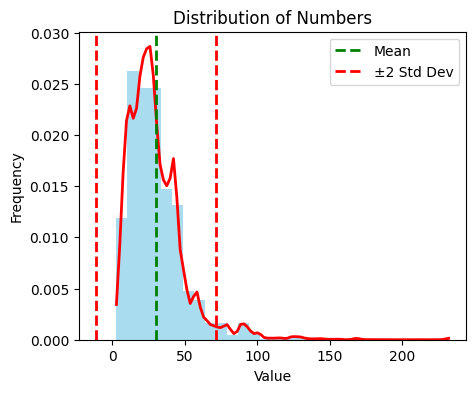

Total number of points: 80656
Upper bound: 71.54177991893461
Percentage of points within 2 std dev: 95.73%


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

#length of journal title.
title_lengths = df['journal_title'].str.len().tolist()

data = np.array(title_lengths)
mean = np.mean(data)
std = np.std(data)

plt.figure(figsize=(5, 4))
plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Numbers')

# Add a kernel density estimate
kde = stats.gaussian_kde(data)
x_range = np.linspace(data.min(), data.max(), 100)
plt.plot(x_range, kde(x_range), 'r-', linewidth=2)

# Add vertical lines for mean and ±2 std
plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean - 2*std, color='red', linestyle='dashed', linewidth=2, label='±2 Std Dev')
plt.axvline(mean + 2*std, color='red', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

lower_bound = mean - 2*std
upper_bound = mean + 2*std
selected_data = data[(data >= lower_bound) & (data <= upper_bound)]

print(f"Total number of points: {len(data)}")
#print(f"Number of points within 2 std dev: {len(selected_data)}")
print(f"Upper bound: {upper_bound}")
print(f"Percentage of points within 2 std dev: {len(selected_data)/len(data)*100:.2f}%")

Here, we will use the upper bound number (mean + 2*std) as the maximum threshold: 71.54

In [ ]:
# Pre-calculated maximum title length
max_title_length = 71.54

# Get lengths of all titles
title_lengths = df['journal_title'].str.len().tolist()

# Filter lengths based on threshold
filtered_title_lengths = [length for length in title_lengths if length <= max_title_length]

# Filter data based on title length
filtered_df = df[df['journal_title'].str.len() <= max_title_length]

# Create scatter plot
fig_title = px.scatter(filtered_df, x='tsne_2D_x', y='tsne_2D_y',
                     hover_data=['title'],
                     color=filtered_title_lengths,
                     color_continuous_scale="Viridis",
                     opacity=0.7)

# Update marker size
fig_title.update_traces(marker=dict(size=3))

# Update layout (match your style)
fig_title.update_layout(
    plot_bgcolor='white',
    height=500, width=900,
    title_font=dict(size=17, family='Optima, sans-serif'),
    font=dict(size=17, family='Optima, sans-serif'),
    showlegend=False,
    coloraxis_colorbar=dict(title='Title Length (Characters)'),
    title="Embeddings Colored by Journal Title Lengths"
)

# Update x-axis and y-axis of both plots
fig_title.update_xaxes(title='', showticklabels=False, showgrid=False)
fig_title.update_yaxes(title='', showticklabels=False, showgrid=False)

fig_title.show()

Output hidden; open in https://colab.research.google.com to view.

### Abstract Length

**Abstract length: No Filters**

In [ ]:
# Add column for Abstract Length
df['Abstract Length'] = df['abstract'].str.len().tolist()


# Create the scatter plot using Plotly Express with the 'Turbo' color scale
fig = px.scatter(df, x='tsne_2D_x', y='tsne_2D_y',
                 color='Abstract Length',  # Color by sample size
                 hover_data=['title', 'Abstract Length'],
                 color_continuous_scale="Viridis",  # Using the 'Turbo' color scale
                 title='2D t-SNE Embeddings Colored by Abstract Length')

# Update marker size for better visibility
fig.update_traces(marker=dict(size=3))

# Update layout
fig.update_layout(
    title="Embeddings Colored by Abstract (No Filter)",
    plot_bgcolor='white',
    height=500, width=900,
    title_font=dict(size=17, family='Optima, sans-serif'),
    font=dict(size=17, family='Optima, sans-serif'),
    #showlegend=False,
    coloraxis_colorbar=dict(title='Abstract Length (Characters)')
)

# Update x-axis and y-axis of both plots
fig.update_xaxes(title='', showticklabels=False, showgrid=False)
fig.update_yaxes(title='', showticklabels=False, showgrid=False)

# Show the figure
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Abstract length: Filtered**

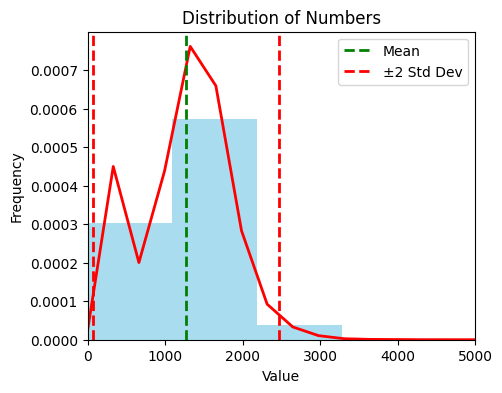

Total number of points: 80656
Lower bound: 69.32663321448103
Upper bound: 2469.6006381602465
Percentage of points within 2 std dev: 98.09%


In [ ]:
abstract_lengths = df['abstract'].str.len().tolist()

data = np.array(abstract_lengths)
mean = np.mean(data)
std = np.std(data)

plt.figure(figsize=(5, 4))
plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Numbers')

# Add a kernel density estimate
kde = stats.gaussian_kde(data)
x_range = np.linspace(data.min(), data.max(), 100) # for upper limit use data.max()
plt.plot(x_range, kde(x_range), 'r-', linewidth=2)

# Add vertical lines for mean and ±2 std
plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean - 2*std, color='red', linestyle='dashed', linewidth=2, label='±2 Std Dev')
plt.axvline(mean + 2*std, color='red', linestyle='dashed', linewidth=2)

plt.xlim(0, 5000)
plt.legend()
plt.show()

lower_bound = mean - 2*std
upper_bound = mean + 2*std
selected_data = data[(data >= lower_bound) & (data <= upper_bound)]

print(f"Total number of points: {len(data)}")
#print(f"Number of points within 2 std dev: {len(selected_data)}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Percentage of points within 2 std dev: {len(selected_data)/len(data)*100:.2f}%")

Here, we will use data within 2 SD of the mean.

In [ ]:
# Pre-calculated abstract length thresholds
min_abstract_length = 69.32
max_abstract_length = 2469.608

# Get lengths of all abstracts
abstract_lengths = df['abstract'].str.len().tolist()

# Filter lengths based on threshold
filtered_abstract_lengths = [length for length in abstract_lengths if min_abstract_length <= length <= max_abstract_length]

# Filter data based on abstract length
filtered_df_abstract = df[(df['abstract'].str.len() >= min_abstract_length) & (df['abstract'].str.len() <= max_abstract_length)]

# Create scatter plot
fig_abstract = px.scatter(filtered_df_abstract, x='tsne_2D_x', y='tsne_2D_y',
                     hover_data=['title'],
                     color=filtered_abstract_lengths,
                     color_continuous_scale="Viridis",
                     opacity=0.7)

# Update marker size
fig_abstract.update_traces(marker=dict(size=3))

# Update layout (match your style)
fig_abstract.update_layout(
    plot_bgcolor='white',
    height=500, width=900,
    title_font=dict(size=17, family='Optima, sans-serif'),
    font=dict(size=17, family='Optima, sans-serif'),
    showlegend=False,
    coloraxis_colorbar=dict(title='Abstract Length (Characters)'),
    title="Embeddings Colored by Journal Abstract Lengths"
)

# Update x-axis and y-axis of both plots
fig_abstract.update_xaxes(title='', showticklabels=False, showgrid=False)
fig_abstract.update_yaxes(title='', showticklabels=False, showgrid=False)

fig_abstract.show()

Output hidden; open in https://colab.research.google.com to view.

## Number of Authors

**without filters**

In [ ]:
df['authors'] = df['authors'].fillna('')  # Fill empty values with empty strings

# Calculate the number of authors and add it as a new column
df['num_authors'] = df['authors'].apply(lambda x: len(re.findall(r",", x)) + 1)

print("stats on the number of authors:")
print(df['num_authors'].describe())

# Plot 2D tSNE with adjusted opacity, size, and color scale
fig = px.scatter(df, x='tsne_2D_x', y='tsne_2D_y',
                    hover_data=['title'],
                    color=df['num_authors'],  # Assuming numerical values in num_authors
                    color_continuous_scale="Viridis",  # Using the 'Viridis' color scale
                    opacity=0.7,
                    )

# Update marker size for better visibility
fig.update_traces(marker=dict(size=3))

# Update layout
fig.update_layout(
    title="Embeddings Colored by Number of Authors (No Filter)",
    plot_bgcolor='white',
    height=500, width=900,
    title_font=dict(size=17, family='Optima, sans-serif'),
    font=dict(size=17, family='Optima, sans-serif'),
    #showlegend=False,
    coloraxis_colorbar=dict(title='Number of Authors')
)

# Update x-axis and y-axis of both plots
fig.update_xaxes(title='', showticklabels=False, showgrid=False)
fig.update_yaxes(title='', showticklabels=False, showgrid=False)

# Show the figure
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**with filters**

This is a plotting the embeddings based on number of co-authors.
The total number of embeddings was 80645, and we plotted  80234 which is 99.5% of the data.

In [ ]:
# Optional filtering (uncomment if needed)
filtered_df = df[df['num_authors'] <= 35.968] #2 std deviations from mean

# Plot 2D tSNE with adjusted opacity, size, and color scale
fig_authors = px.scatter(filtered_df, x='tsne_2D_x', y='tsne_2D_y',
                    hover_data=['title'],
                    color=filtered_df['num_authors'],  # Assuming numerical values in num_authors
                    color_continuous_scale="Viridis",  # Using the 'Viridis' color scale
                    opacity=0.7,
                    )

# Update marker size for better visibility
fig_authors.update_traces(marker=dict(size=3))

# Update layout
fig_authors.update_layout(
    title="Embeddings Colored by Number of Authors",
    plot_bgcolor='white',
    height=500, width=900,
    title_font=dict(size=17, family='Optima, sans-serif'),
    font=dict(size=17, family='Optima, sans-serif'),
    #showlegend=False,
    coloraxis_colorbar=dict(title='Number of Authors')
)

# Update x-axis and y-axis of both plots
fig_authors.update_xaxes(title='', showticklabels=False, showgrid=False)
fig_authors.update_yaxes(title='', showticklabels=False, showgrid=False)

# Show the figure
fig_authors.show()

Output hidden; open in https://colab.research.google.com to view.